In [3]:
import json
import numpy as np
import pandas as pd
import requests

#inisialisasi
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None


In [5]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


<ipython-input-5-710df0c3812b>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


In [6]:
#Merubah format date pada data
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format= '%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [7]:
#Mengambil data countries
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


<ipython-input-7-0812000fffe4>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries = pd.io.json.json_normalize(get_json(countries_url))


In [8]:
#menggabungkan data covid pada
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized.head())


  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


In [9]:
#menghitung fatality ratio
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [12]:
#Menampilkan negara dengan fatality ratio tertinggi
print("Negara dengan fatality ratio tertinggi")
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False)
print(df_top_20_fatality_rate.head(5))

Negara dengan fatality ratio tertinggi
    country last_update   cases  deaths  recovered  \
134      YE  2020-08-16    1869     530       1013   
11       GB  2020-08-16  320343   46791       1486   
16       IT  2020-08-16  253915   35396     203786   
36       BE  2020-08-16   77869    9935      17981   
105      HU  2020-08-16    4916     608       3623   

                                                  name  fatality_ratio  
134                                              Yemen        0.283574  
11   United Kingdom of Great Britain and Northern I...        0.146065  
16                                               Italy        0.139401  
36                                             Belgium        0.127586  
105                                            Hungary        0.123678  


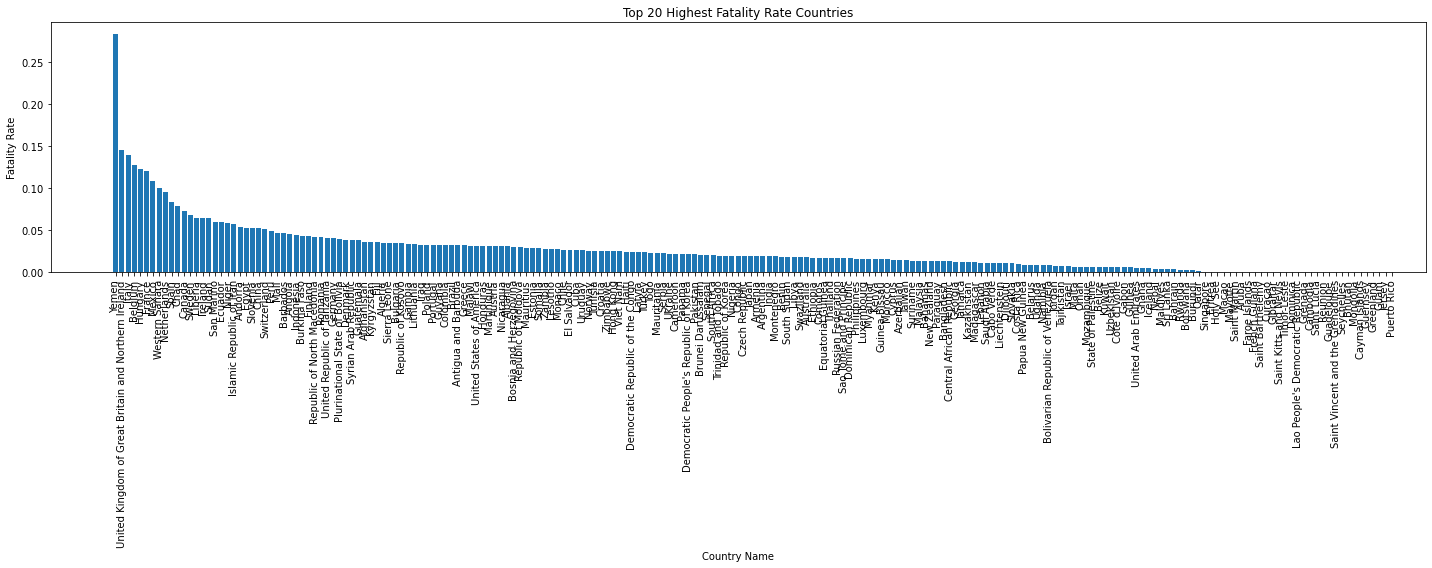

In [13]:
#Visualisasi data

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
#Menggabungkan data
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1
    
print(df_covid_timeline_merged.head())


<ipython-input-18-e342e6aadcef>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))


  country last_update  cases  deaths  recovered
0      VN  2020-10-13   1110      35       1025
1      VN  2020-10-12   1110      35       1025
2      VN  2020-10-11   1109      35       1024
3      VN  2020-10-10   1107      35       1024
4      VN  2020-10-09   1105      35       1024


In [20]:
#Gabungkan data country dgn data Covid19
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
print(df_covid_timeline_denormalized.head())

  country last_update  cases  deaths  recovered      name
0      VN  2020-10-13   1110      35       1025  Viet Nam
1      VN  2020-10-12   1110      35       1025  Viet Nam
2      VN  2020-10-11   1109      35       1024  Viet Nam
3      VN  2020-10-10   1107      35       1024  Viet Nam
4      VN  2020-10-09   1105      35       1024  Viet Nam


In [21]:
#Kasus Covid di Asean pada bulan Maret
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]
print(df_covid_timeline_denormalized.head())

  country last_update  cases  deaths  recovered      name
0      VN  2020-10-13   1110      35       1025  Viet Nam
1      VN  2020-10-12   1110      35       1025  Viet Nam
2      VN  2020-10-11   1109      35       1024  Viet Nam
3      VN  2020-10-10   1107      35       1024  Viet Nam
4      VN  2020-10-09   1105      35       1024  Viet Nam


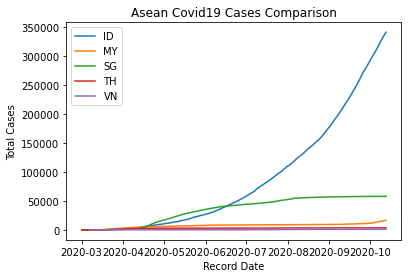

In [22]:
#Visualisasi Covid di ASEAN
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()
